In [61]:
import numpy as np
import grid_world_class as gw
import riverswim_class as rs 
import riverswim_class_smdp as rs_s 

import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import e_greedy as egreed  
import experiment_utils as utils
import importlib
importlib.reload(gw)
importlib.reload(rs)
importlib.reload(rs_s)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(egreed)
importlib.reload(utils)
import matplotlib.pyplot as plt

In [64]:
def scenario_generator(nS, grid_size = 4, include_extra_env=False):
    nS_grid = np.ones(grid_size)*nS
    T_grid = [1,round(0.33*nS,0),round(0.66*nS,0),nS]
    nS_grid = nS_grid.tolist()
    if include_extra_env:
        T_grid = [1] + T_grid
        nS_grid = [nS] + nS_grid
    return list(map(int, nS_grid)), list(map(int,T_grid))

n_reps = 8
T = 10**3

S = 5
nS_list, T_max_list = scenario_generator(nS=S)
envs = utils.create_multiple_envs(nS_list, T_max_list, rs.riverswim,reps = 2)


algos = utils.create_multiple_algos(ucrlS.BUS, nS_list, T_max_list = [None], T_max_grid = T_max_list , nA = 2, imprv = 1)
algos += utils.create_multiple_algos(ucrlS.BUS3, [nS_list[0]], T_max_list = [None],T_max_grid = [T_max_list[0]] , nA = 2, imprv = 2)

run = utils.run_multiple_experiments_n_reps(algos, envs, T, n_reps=8, sub_dir = "bus_experiments", save=True)

print("5 done")


TypeError: __init__() missing 8 required positional arguments: 'delta', 'b_r', 'sigma_r', 'b_tau', 'sigma_tau', 'r_max', 'tau_min', and 'tau_max'

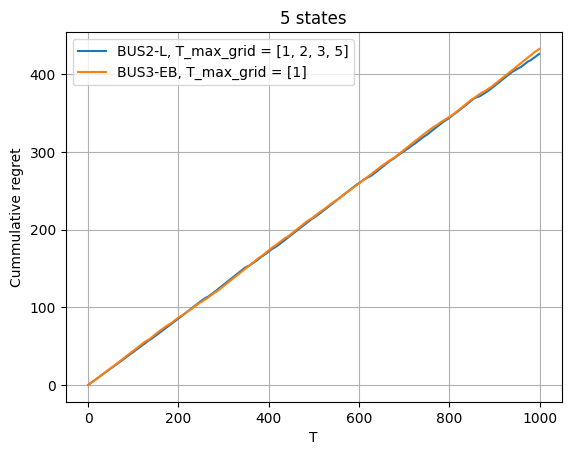

In [63]:
blabla = utils.read_results_dict("experiment_results/S_5.npy")
reg = utils.mean_regret_from_dict(blabla, g_star=0.47)
utils.plot_mean_regret_from_dict(reg, nS = 5)